Number diabetes train dataset:  110896
Number diabetes test dataset:  55449
Total number of diabetes:  166345
90536
90536
[0 1 1 ... 1 1 1]
precision: [0.89708608 0.26050922]
recall: [0.53470335 0.72768295]
fscore: [0.67003558 0.3836665 ]
support: [45255 10194]
accuracy: 0.5701816083247669
              precision    recall  f1-score   support

           0       0.90      0.53      0.67     45255
           1       0.26      0.73      0.38     10194

    accuracy                           0.57     55449
   macro avg       0.58      0.63      0.53     55449
weighted avg       0.78      0.57      0.62     55449

0.6311931492258667
specificity: 0.5347033476963872
sensitivity: 0.7276829507553463


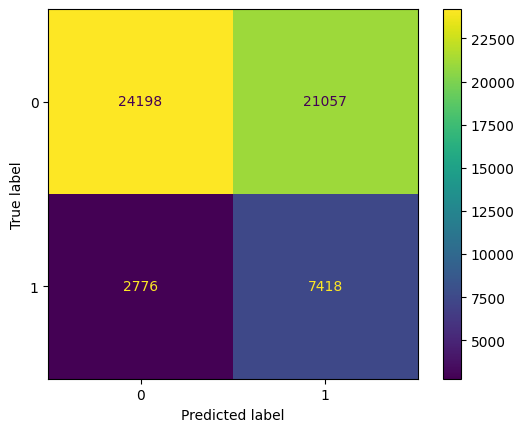

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.metrics import precision_recall_fscore_support,ConfusionMatrixDisplay,accuracy_score
from sklearn.naive_bayes import GaussianNB

# Loading dataset
df = pd.read_csv(r"C:\Users\Roccas\Documents\TMU Data\CIND820 Big Data Analytics Project\LLCP2021XPT\diabetes_health_indicators_BRFSS2021_v21.csv")

# Diabetes is the dependent value
X = df.iloc[:, df.columns != 'Diabetes']
y = df.iloc[:, df.columns == 'Diabetes']

# Splitting Original dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

print("Number diabetes train dataset: ", len(X_train))
print("Number diabetes test dataset: ", len(X_test))
print("Total number of diabetes: ", len(X_train)+len(X_test))

# Apply SMOTE to create observations for Diabetes
sm = SMOTE(sampling_strategy='minority')
X_train_sampled,y_train_sampled = sm.fit_resample(X_train,y_train.values.ravel())
y.value_counts()

# Confirm values are similar now
print(np.count_nonzero(y_train_sampled == 0))
print(np.count_nonzero(y_train_sampled == 1))

# Gaussian Naive Bayes
SC = StandardScaler()
xtrain = SC.fit_transform(X_train_sampled)
xtest = SC.transform(X_test)

GNB = GaussianNB()
GNB.fit(xtrain, y_train_sampled).predict(xtest)
y_pred_GNB = GNB.predict(xtest)
print(y_pred_GNB)

# Confusion Matrix 
CM_GNB = confusion_matrix(y_test, y_pred_GNB)
disp = ConfusionMatrixDisplay(confusion_matrix=CM_GNB)
disp.plot()

# Calculating Classifier performances
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_GNB)
accuracy = accuracy_score(y_test, y_pred_GNB)

# Code to print out results
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('accuracy: {}'.format(accuracy))

# Classification report with tabled results + AUC score
print(classification_report(y_test, y_pred_GNB))
print(roc_auc_score(y_test, y_pred_GNB))

# Manually calculating specificity + sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_GNB).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('specificity: {}'.format(specificity))
print('sensitivity: {}'.format(sensitivity))